<a href="https://colab.research.google.com/github/nafiul-araf/zep-analytics-task/blob/main/EDA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This note book covers the data transformation, data analysis, statistical analysis, exploratory data analysis and data cleaning**

# Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Zep Analytics/House Price Prediction/House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00



**[Data scource](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data)**

**The 8 independent features are: area type that means in which type of area the house belongs to, location of house, availability that means when the house will available., size (total rooms), society of the house, total bathrooms, total balconies and total sqft of the house. The dependent feature is the price.**

In [ ]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (13320, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.rename(columns={'price': 'price (in lakhs)'}, inplace=True)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price (in lakhs)
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Analysis and Transformation

### **Checking the categorical columns**

In [ ]:
def check_cat_cols(data, col):
  """The function is created to analyze the dataset's category columns. It looks for columns with distinct values or categories.

  Args:
      data: The dataset
      col: The particular column
  
  Returns:
      Prints a list of unique values and the total number of those unique values.
  """

  print(f"Unique values of the {col} column: {df[col].unique()}\n")
  print(f"Total unique values of the {col} column: {len(df[col].unique())}")

In [ ]:
check_cat_cols(df, 'size')

Unique values of the size column: ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']

Total unique values of the size column: 32


In [ ]:
import re

###### **Transforming the size column values**

In [ ]:
df['size']=df['size'].apply(lambda x: re.sub(r'BHK', ' ', str(x)))
df['size']=df['size'].apply(lambda x: re.sub(r'Bedroom', ' ', str(x)))
df['size']=df['size'].apply(lambda x: re.sub(r'RK', ' ', str(x)))
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price (in lakhs)
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [ ]:
check_cat_cols(df, 'availability')

Unique values of the availability column: ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']

Total unique values of the availability column: 81


***Availability is not a necessary column***

In [ ]:
df.drop('availability', axis=1, inplace=True)
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price (in lakhs)
0,Super built-up Area,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [ ]:
check_cat_cols(df, 'area_type')

Unique values of the area_type column: ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

Total unique values of the area_type column: 4


In [ ]:
check_cat_cols(df, 'location')

Unique values of the location column: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']

Total unique values of the location column: 1306


In [ ]:
check_cat_cols(df, 'society')

Unique values of the society column: ['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']

Total unique values of the society column: 2689


In [ ]:
check_cat_cols(df, 'balcony')

Unique values of the balcony column: [ 1.  3. nan  2.  0.]

Total unique values of the balcony column: 5


In [ ]:
check_cat_cols(df, 'bath')

Unique values of the bath column: [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]

Total unique values of the bath column: 20


In [ ]:
print(f"Information of the variables: \n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13320 non-null  object 
 1   location          13319 non-null  object 
 2   size              13320 non-null  object 
 3   society           7818 non-null   object 
 4   total_sqft        13320 non-null  object 
 5   bath              13247 non-null  float64
 6   balcony           12711 non-null  float64
 7   price (in lakhs)  13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB
Information of the variables: 
None


###### **Transforming the numerical object data types to numerical (float64)**

In [ ]:
df['size']=df['size'].astype('float64')
# df['total_sqft']=df['total_sqft'].astype('float64')  (ValueError: could not convert string to float: '2100 - 2850')
print(f"Information of the variables: \n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13320 non-null  object 
 1   location          13319 non-null  object 
 2   size              13304 non-null  float64
 3   society           7818 non-null   object 
 4   total_sqft        13320 non-null  object 
 5   bath              13247 non-null  float64
 6   balcony           12711 non-null  float64
 7   price (in lakhs)  13320 non-null  float64
dtypes: float64(4), object(4)
memory usage: 832.6+ KB
Information of the variables: 
None


In [ ]:
def type_conversion(data):
  """The "-" sign is split by the function, which then converts it to a float in order to clean up a certain range of data values. For instance, a particular 
  data point which is 1100-1200. There are "-" in this range between 1100 and 1200, which is in text format and does not convert to a float. Thus, this 
  function divides the range by "-" at first. Afterwards, it determines if there are two values, in this case, 1100 and 1200. If so, it added up the two 
  figures (1100+1200), divided by 2, and then determined the average. The final value of that particular data is regarded to be the average value, and it is 
  transformed to a float.

  Args:
      data: The dataset with the particular column

  Returns:
      Average value of the range in floating point value
  """
  
  x=data.split('-')
  if len(x) == 2:
      return (float(x[0])+float(x[1]))/2
  try:
      return float(data)
  except:
      return None 

In [ ]:
df['total_sqft']=df['total_sqft'].apply(type_conversion)

print(f"Information of the variables: \n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13320 non-null  object 
 1   location          13319 non-null  object 
 2   size              13304 non-null  float64
 3   society           7818 non-null   object 
 4   total_sqft        13274 non-null  float64
 5   bath              13247 non-null  float64
 6   balcony           12711 non-null  float64
 7   price (in lakhs)  13320 non-null  float64
dtypes: float64(5), object(3)
memory usage: 832.6+ KB
Information of the variables: 
None


###### **Label encoding to the text categorical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df[['area_type', 'location', 'society']]=df[['area_type', 'location', 'society']].apply(le.fit_transform)
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price (in lakhs)
0,3,419,2.0,464,1056.0,2.0,1.0,39.07
1,2,317,4.0,2439,2600.0,5.0,3.0,120.00
2,0,1179,3.0,2688,1440.0,2.0,3.0,62.00
3,3,757,3.0,2186,1521.0,3.0,1.0,95.00
4,3,716,2.0,2688,1200.0,2.0,1.0,51.00


In [ ]:
print(f"Information of the variables: \n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13320 non-null  int64  
 1   location          13320 non-null  int64  
 2   size              13304 non-null  float64
 3   society           13320 non-null  int64  
 4   total_sqft        13274 non-null  float64
 5   bath              13247 non-null  float64
 6   balcony           12711 non-null  float64
 7   price (in lakhs)  13320 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 832.6 KB
Information of the variables: 
None


### **Checking the missing values**

In [ ]:
print(f"Checking the null values: \n{df.isnull().sum()}")

Checking the null values: 
area_type             0
location              0
size                 16
society               0
total_sqft           46
bath                 73
balcony             609
price (in lakhs)      0
dtype: int64


***There are some missing values in the data***

###### **Filling the missing values with the mode for the categorical columns**

In [ ]:
def filling_null_mode(data):
  """This function is used to handle the categorical columns' missing data according to their value modes.

  Args:
      data: The dataset with the particular column

  Returns:
      Fills the null values with the mode and returns it
  """
  data=data.fillna(data.mode()[0])
  return data

In [ ]:
df[['size']]=df[['size']].apply(filling_null_mode)
df[['bath']]=df[['bath']].apply(filling_null_mode)
df[['balcony']]=df[['balcony']].apply(filling_null_mode)

print(f"Checking the null values: \n{df.isnull().sum()}")

Checking the null values: 
area_type            0
location             0
size                 0
society              0
total_sqft          46
bath                 0
balcony              0
price (in lakhs)     0
dtype: int64


###### **Filling the missing values with the mean for the continous columns**

In [ ]:
df[['total_sqft']]=df[['total_sqft']].fillna(df[['total_sqft']].mean()[0])
print(f"Checking the null values: \n{df.isnull().sum()}")

Checking the null values: 
area_type           0
location            0
size                0
society             0
total_sqft          0
bath                0
balcony             0
price (in lakhs)    0
dtype: int64


### **Checking the duplicate values**

In [ ]:
duplicate=df[df.duplicated()]
 
print(f"There are {len(duplicate)} duplicate Rows")

There are 652 duplicate Rows


###### **Dropping the duplicates**

In [ ]:
print(f"Data shape before dropping the duplicate rows: {df.shape}\n")
df.drop_duplicates(inplace=True,ignore_index=True)
duplicate=df[df.duplicated()]
df.reset_index(drop=True, inplace=True)
print(f"Duplicate Rows: \n\n {duplicate}\n\n and data shape: {df.shape}")

Data shape before dropping the duplicate rows: (13320, 8)

Duplicate Rows: 

 Empty DataFrame
Columns: [area_type, location, size, society, total_sqft, bath, balcony, price (in lakhs)]
Index: []

 and data shape: (12668, 8)


***There were 652 duplicate values.***

In [ ]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price (in lakhs)
0,3,419,2.0,464,1056.0,2.0,1.0,39.07
1,2,317,4.0,2439,2600.0,5.0,3.0,120.00
2,0,1179,3.0,2688,1440.0,2.0,3.0,62.00
3,3,757,3.0,2186,1521.0,3.0,1.0,95.00
4,3,716,2.0,2688,1200.0,2.0,1.0,51.00


###### **Data stats**

In [ ]:
print(f"Summary stats of the data: \n")
np.round(df.describe(), 3)

Summary stats of the data: 



,area_type,location,size,society,total_sqft,bath,balcony,price (in lakhs)
count,12668.000,12668.000,12668.000,12668.000,12668.000,12668.000,12668.000,12668.000
mean,2.264,673.002,2.821,1911.195,1572.066,2.708,1.604,114.713
std,1.158,365.560,1.315,868.491,1262.132,1.359,0.809,152.047
min,0.000,0.000,1.000,0.000,1.000,1.000,0.000,8.000
25%,2.000,397.000,2.000,1243.000,1100.000,2.000,1.000,50.000
50%,3.000,654.000,3.000,2232.000,1288.500,2.000,2.000,73.000
75%,3.000,999.000,3.000,2688.000,1691.000,3.000,2.000,122.000
max,3.000,1305.000,43.000,2688.000,52272.000,40.000,3.000,3600.000


In [ ]:
print(f"Checking the skewness of the data.\nMean of the columns: \n{df.mean()} \n Median of the columns: \n{df.median()}")

Checking the skewness of the data.
Mean of the columns: 
area_type              2.264367
location             673.001895
size                   2.820808
society             1911.195295
total_sqft          1572.066238
bath                   2.708083
balcony                1.603884
price (in lakhs)     114.712707
dtype: float64 
 Median of the columns: 
area_type              3.0
location             654.0
size                   3.0
society             2232.0
total_sqft          1288.5
bath                   2.0
balcony                2.0
price (in lakhs)      73.0
dtype: float64




1.   **area_type:** Mean < Median, so ***Left*** skewed
2.   **location:** Mean slightly > Median, so ***slightly Right*** skewed
1.   **size:** Mean < Median slightly, so ***slightly Left*** skewed
1.   **society:** Mean < Median, so ***Left*** skewed
1.   **total_sqft:** Mean > Median, so ***Right*** skewed
1.   **bath:** Mean slightly > Median, so ***slightly Right*** skewed
1.   **balcony:** Mean < Median slightly, so ***slightly Left*** skewed
1.   **price (in lakhs):** Mean > Median, so ***Right*** skewed

# Statistical Analysis

## Univariate Analysis (UA)

### **UA for area type column**

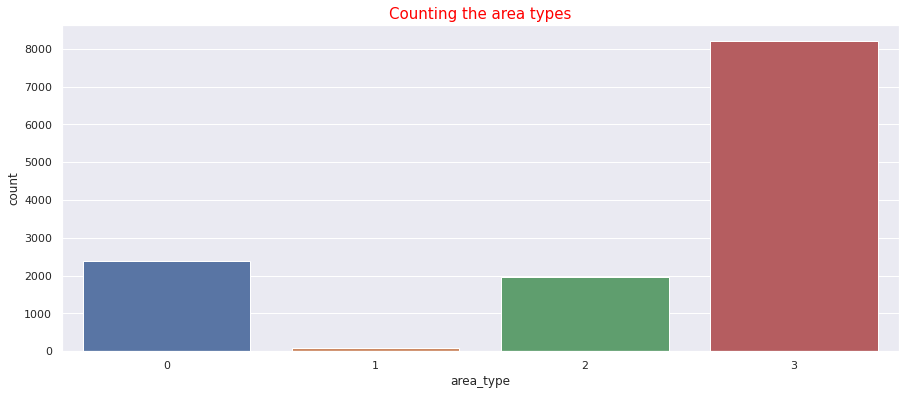

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(df['area_type'])
plt.title("Counting the area types" , fontsize=15, color="red")
plt.show()

In [ ]:
df[df.area_type==1].shape

(87, 8)

***Here we can see that area type 1 is very low than the others. We may consider it as outliers but we can confirm it from the outlier analysis.***

### **UA for location column**

In [ ]:
df_loc=df.location.value_counts().reset_index(name='location_count')
print(f"First five rows: \n{df_loc.head()}\nLast five rows: \n{df_loc.tail()}")

First five rows: 
   index  location_count
0   1252             514
1   1039             368
2    417             282
3    664             236
4   1148             229
Last five rows: 
      index  location_count
1301     32               1
1302    171               1
1303   1299               1
1304   1180               1
1305     87               1


In [ ]:
len(df_loc[df_loc['location_count'] <= 5])

927

***Any location which appears less than or equal to 5 we can remove those locations***

In [ ]:
df_loc=df_loc.head(25)

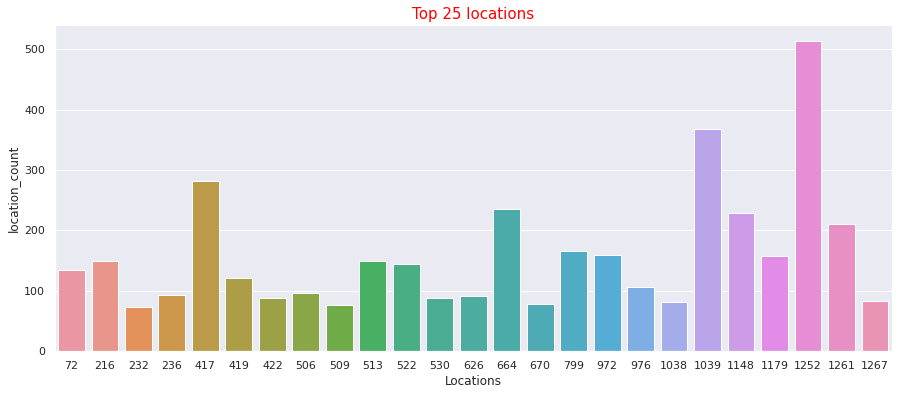

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='index', y='location_count', data=df_loc)
plt.title("Top 25 locations" , fontsize=15, color="red")
plt.xlabel('Locations')
plt.show()

***Maximum appearance of any location is around 500 that means location is a big factor for housing prices.***

### **UA for size column**

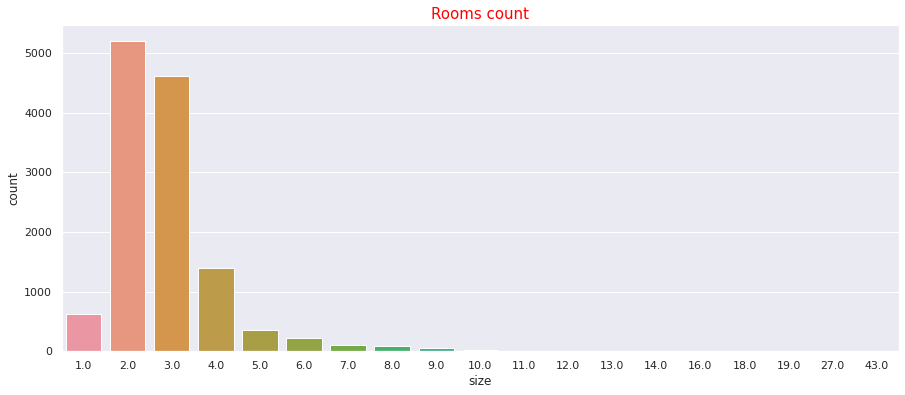

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(df['size'])
plt.title("Rooms count" , fontsize=15, color="red")
plt.show()

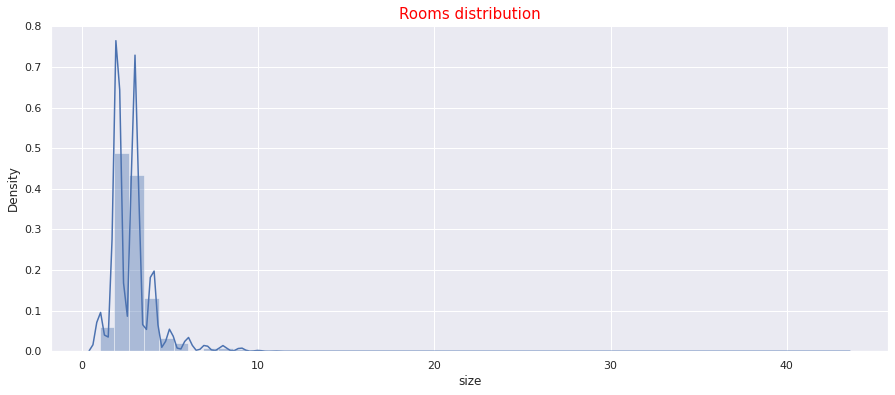

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(df['size'])
plt.title("Rooms distribution" , fontsize=15, color="red")
plt.show()

***We can observe that most homes have two or three rooms. Since rooms with more than 6 are extremely uncommon, we will remove the data for rooms with 7 or more.***

In [ ]:
df_size=df[df['size'] >= 5.0]
len(df_size)

839

In [ ]:
df_size=df[df['size'] < 5.0]
len(df_size)

11829

### **UA for society column**

In [ ]:
df_society=df.society.value_counts().reset_index(name='society_count')
print(f"First five rows: \n{df_society.head()}\nLast five rows: \n{df_society.tail()}")

First five rows: 
   index  society_count
0   2688           5303
1    806             68
2   1636             52
3    307             51
4   1530             51
Last five rows: 
      index  society_count
2684     51              1
2685   1198              1
2686   2127              1
2687   2437              1
2688   1702              1


In [ ]:
len(df_society[df_society['society_count'] <= 2])

2012

In [ ]:
df_society=df_society.head(25)

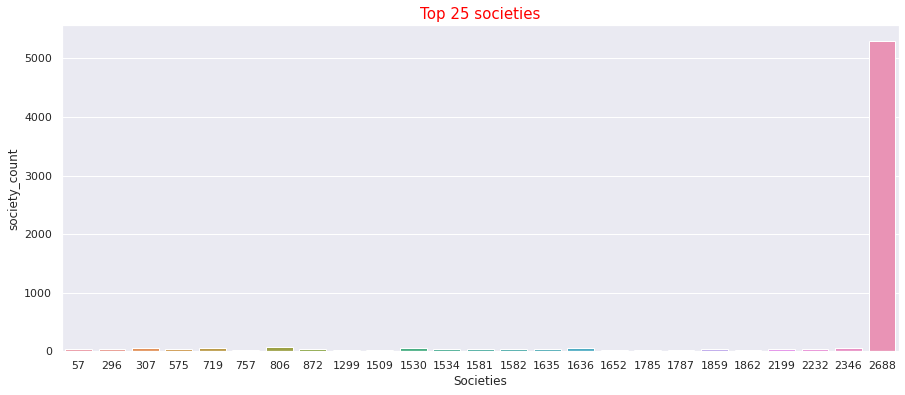

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='index', y='society_count', data=df_society)
plt.title("Top 25 societies" , fontsize=15, color="red")
plt.xlabel('Societies')
plt.show()

***Maximun number of societies are coming from 2688 which was encoded for the null values. So we can remove the column as it is not necessary to build the model.***

In [ ]:
df.drop('society', axis=1, inplace=True)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price (in lakhs)
0,3,419,2.0,1056.0,2.0,1.0,39.07
1,2,317,4.0,2600.0,5.0,3.0,120.00
2,0,1179,3.0,1440.0,2.0,3.0,62.00
3,3,757,3.0,1521.0,3.0,1.0,95.00
4,3,716,2.0,1200.0,2.0,1.0,51.00


### **UA for bath column**

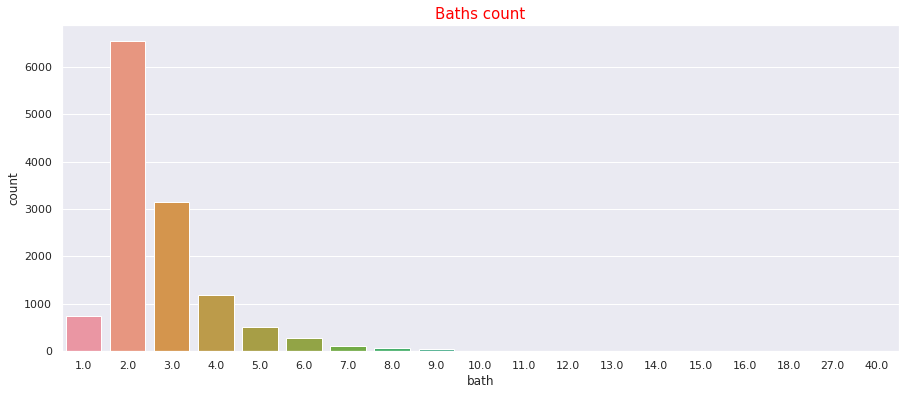

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(df['bath'])
plt.title("Baths count" , fontsize=15, color="red")
plt.show()

***The graph gives the impression that most homes have two or three bathrooms. Considering up to 5 bathrooms in relation to a 6 rooms house (4 baths for 4 bedrooms and one servant bath)***

In [ ]:
df_bath=df[df['bath'] >= 6.0]
len(df_bath)

512

In [ ]:
df_bath=df[df['bath'] < 6.0]
len(df_bath)

12156

### **UA for balcony column**

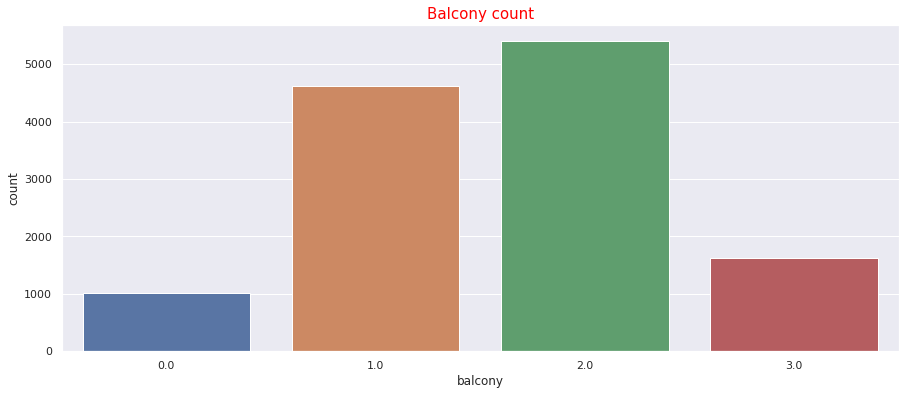

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(df['balcony'])
plt.title("Balcony count" , fontsize=15, color="red")
plt.show()

***A home without a balcony is strange. The data will be deleted with 0 balcony. We have taken into consideration up to four bedrooms, thus it is entirely probable that any bedroom will be modest and lack a balcony.***

### **UA for total_sqrt column**

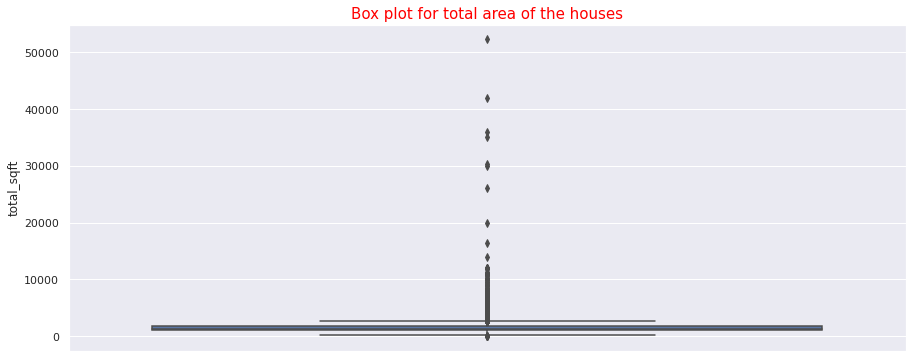

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['total_sqft'])
plt.title('Box plot for total area of the houses', fontsize=15, color='red')
plt.show()

***The box plot makes it evident that there are outliers. A house with more than 5000 square feet is extremely rare. We'll evaluate it using an outlier analysis.***

### **UA for price column**

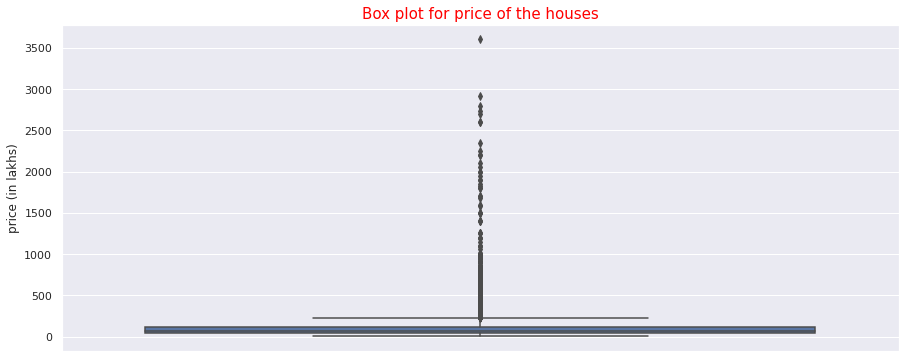

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['price (in lakhs)'])
plt.title('Box plot for price of the houses', fontsize=15, color='red')
plt.show()

***The box plot makes it evident that there are outliers. We'll evaluate it using an outlier analysis.***

## Bivariate Analysis (BA)


**Any column with the house price column**

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price (in lakhs)
0,3,419,2.0,1056.0,2.0,1.0,39.07
1,2,317,4.0,2600.0,5.0,3.0,120.00
2,0,1179,3.0,1440.0,2.0,3.0,62.00
3,3,757,3.0,1521.0,3.0,1.0,95.00
4,3,716,2.0,1200.0,2.0,1.0,51.00


### **BA of area type column**

<Figure size 1080x432 with 0 Axes>

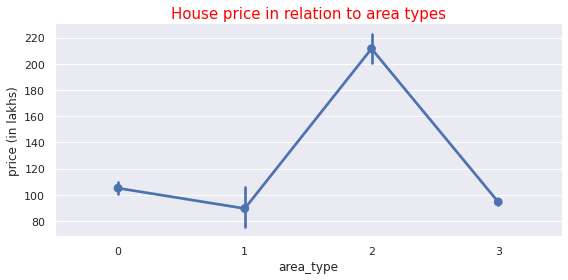

In [ ]:
plt.figure(figsize=(15, 6))
print(sns.factorplot(x='area_type', y='price (in lakhs)', data=df, size=4, aspect=2))
plt.title('House price in relation to area types', fontsize=15, color='red')
plt.tight_layout()
#plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

In [ ]:
df.groupby('area_type')['price (in lakhs)'].agg(['mean','median','size'])

,mean,median,size
area_type,,,
0,105.032684,70.00,2390
1,89.502356,70.00,87
2,211.604076,140.00,1975
3,94.504346,65.28,8216


***It is evident that the median is the same for both area types 0 and 1. It declines for type 1 and rises for type 2. Both the mean and the median are high for area type 2. As a result, area type 2 can be described as expensive.***

1.   0-Built up area
2.   1-carpet area
3.   2-plot area
4.   3-Super built up area



### **BA of location column**

In [ ]:
df_loc

,index,location_count
0,1252,514
1,1039,368
2,417,282
3,664,236
4,1148,229
5,1261,210
6,799,166
7,972,159
8,1179,157
9,513,150


In [ ]:
df.location.dtypes

dtype('int64')

In [ ]:
d=pd.concat([df[df['location'] == 1252], df[df['location'] == 1039], df[df['location'] == 417], df[df['location'] == 664], df[df['location'] == 1148], 
             df[df['location'] == 1261], df[df['location'] == 799], df[df['location'] == 972], df[df['location'] == 1179], df[df['location'] == 513], 
             df[df['location'] == 216], df[df['location'] == 522], df[df['location'] == 72], df[df['location'] == 419], df[df['location'] == 976], 
             df[df['location'] == 506], df[df['location'] == 236], df[df['location'] == 626], df[df['location'] == 422], df[df['location'] == 530], 
             df[df['location'] == 1267], df[df['location'] == 1038], df[df['location'] == 670], df[df['location'] == 509], df[df['location'] == 232]])
d

,area_type,location,size,total_sqft,bath,balcony,price (in lakhs)
5,3,1252,2.0,1170.0,2.0,1.0,38.00
10,3,1252,3.0,1800.0,2.0,2.0,70.00
11,2,1252,4.0,2785.0,5.0,3.0,295.00
27,0,1252,3.0,1610.0,3.0,2.0,81.00
47,3,1252,2.0,1459.0,2.0,1.0,94.82
...,...,...,...,...,...,...,...
11975,3,232,2.0,1215.0,2.0,1.0,43.75
12110,0,232,2.0,1200.0,2.0,2.0,44.73
12149,3,232,2.0,1160.0,2.0,2.0,42.00
12182,3,232,3.0,1583.0,3.0,1.0,95.23


In [ ]:
len(d.location.unique())

25

In [ ]:
d=d.reset_index(drop=True)

<Figure size 1080x432 with 0 Axes>

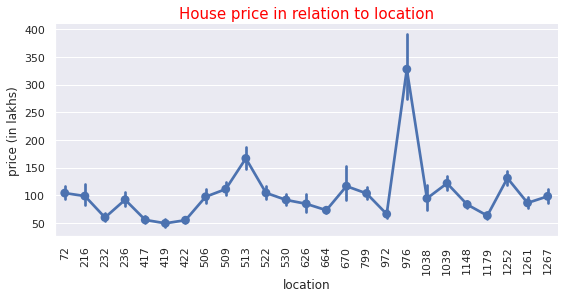

In [ ]:
plt.figure(figsize=(15, 6))
print(sns.factorplot(x='location', y='price (in lakhs)', data=d, size=4, aspect=2))
plt.title('House price in relation to location', fontsize=15, color='red')
plt.tight_layout()
plt.xticks(rotation=90)
#plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

In [ ]:
df.groupby('location')['price (in lakhs)'].agg(['mean','median','size']).sort_values('mean', ascending=False)

,mean,median,size
location,,,
351,1900.000000,1900.000,1
145,1486.000000,1486.000,2
362,1167.714286,365.000,7
1265,1093.388889,1675.000,9
339,1068.000000,1068.000,2
...,...,...,...
298,19.245000,19.245,2
162,17.000000,17.000,1
780,16.000000,15.000,3


In [ ]:
df.groupby('location')['price (in lakhs)'].agg(['mean','median','size']).sort_values('median', ascending=False)

,mean,median,size
location,,,
351,1900.000000,1900.0,1
1265,1093.388889,1675.0,9
145,1486.000000,1486.0,2
339,1068.000000,1068.0,2
354,1015.000000,1015.0,1
...,...,...,...
162,17.000000,17.0,1
0,16.000000,16.0,1
105,15.000000,15.0,3


In [ ]:
df_loc_group=df.groupby('location')['price (in lakhs)'].agg(['mean','median','size']).sort_values('size', ascending=False)
df_loc_group

,mean,median,size
location,,,
1252,131.033998,77.00,514
1039,121.706508,85.00,368
417,55.605816,46.00,282
664,73.064894,64.85,236
1148,83.330044,74.75,229
...,...,...,...
1,35.000000,35.00,1
656,95.000000,95.00,1
657,43.040000,43.04,1


**We find that maximum mean and median is for the location 351 yet it appears only one time in the sample. So considers the most appeared sites. The graph shows that the location 976 is where the extreme price is coming from.**

In [ ]:
print(f"Mean, median price of the location 976: \n{df_loc_group[df_loc_group.index==976]}")

Mean, median price of the location 976: 
                mean  median  size
location                          
976       327.693084   250.0   107


### **BA of size column**

<Figure size 1080x432 with 0 Axes>

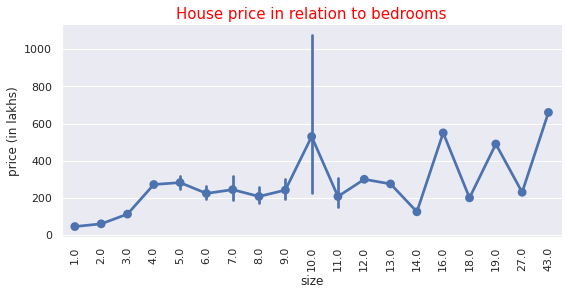

In [ ]:
plt.figure(figsize=(15, 6))
print(sns.factorplot(x='size', y='price (in lakhs)', data=df, size=4, aspect=2))
plt.title('House price in relation to bedrooms', fontsize=15, color='red')
plt.tight_layout()
plt.xticks(rotation=90)
#plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

***Although a house with 10 rooms is quite uncommon, the graph depicting room size with 10 has the median. Additionally, the graph shows that more than 7/8 of the rooms have very erratic attitudes.***

In [ ]:
df.groupby('size')['price (in lakhs)'].agg(['mean','median','size'])

,mean,median,size
size,,,
1.0,45.400478,35.0000,627
2.0,60.121164,54.0275,5204
3.0,112.499541,90.0000,4606
4.0,271.973815,204.0000,1392
5.0,282.261429,172.5000,350
6.0,223.927602,160.0000,221
7.0,244.313131,150.0000,99
8.0,207.550562,160.0000,89
9.0,241.944444,185.0000,54


### **BA of bath column**

<Figure size 1080x432 with 0 Axes>

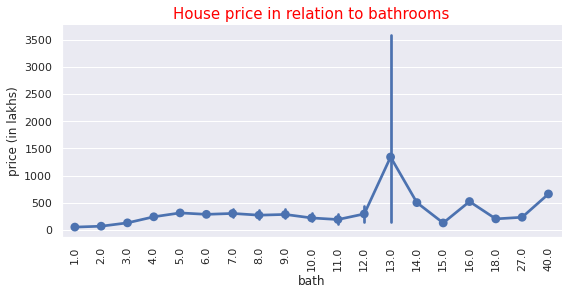

In [ ]:
plt.figure(figsize=(15, 6))
print(sns.factorplot(x='bath', y='price (in lakhs)', data=df, size=4, aspect=2)) #kind='bar', 'strip'
plt.title('House price in relation to bathrooms', fontsize=15, color='red')
plt.tight_layout()
plt.xticks(rotation=90)
#plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

***Bathrooms with 13 has very extreme value***

In [ ]:
df.groupby('bath')['price (in lakhs)'].agg(['mean','median','size'])

,mean,median,size
bath,,,
1.0,48.483072,35.0,752
2.0,64.845778,56.0,6548
3.0,126.666542,100.0,3145
4.0,238.401277,180.0,1194
5.0,310.210348,230.0,517
6.0,283.542435,200.0,271
7.0,300.352941,162.5,102
8.0,268.640625,180.0,64
9.0,281.809524,200.0,42


### **BA of balcony column**

<Figure size 1080x432 with 0 Axes>

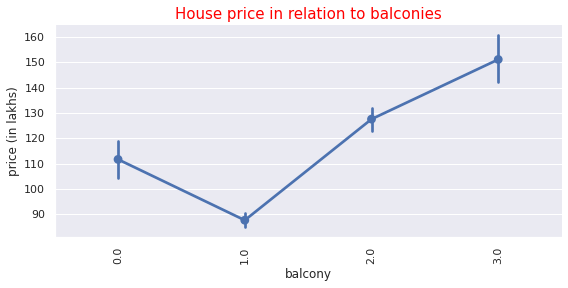

In [ ]:
plt.figure(figsize=(15, 6))
print(sns.factorplot(x='balcony', y='price (in lakhs)', data=df, size=4, aspect=2))
plt.title('House price in relation to balconies', fontsize=15, color='red')
plt.tight_layout()
plt.xticks(rotation=90)
#plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

In [ ]:
df.groupby('balcony')['price (in lakhs)'].agg(['mean','median','size'])

,mean,median,size
balcony,,,
0.0,111.645705,75.0,1007
1.0,87.614612,61.0,4627
2.0,127.540737,80.0,5411
3.0,151.101423,95.0,1623


***Balcony has positive correlation with the price which is logical***

### **BA of total sqft column**

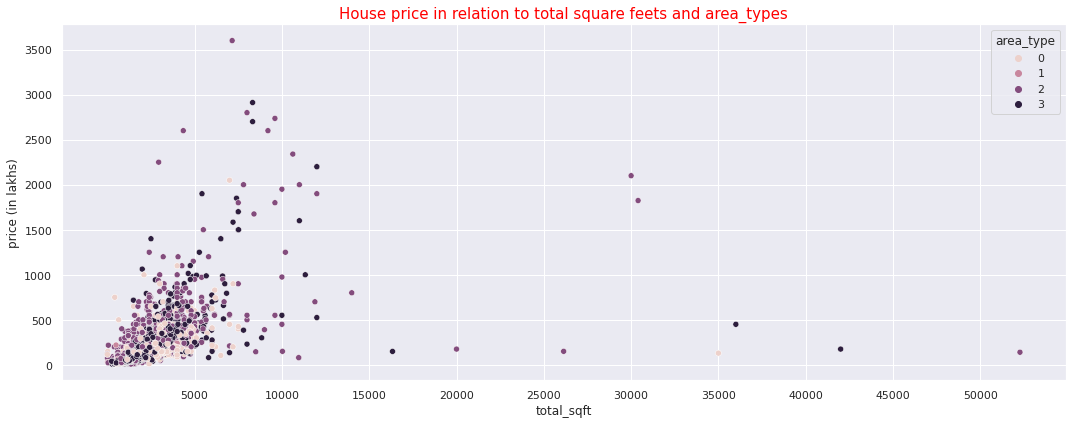

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='total_sqft', y='price (in lakhs)', hue='area_type', data=df)
plt.title(f"House price in relation to total square feets and area_types" , fontsize=15, color="red")
plt.tight_layout()
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

***As can be seen, the price of housing increases as the square footage increases and with higher levels of area type.***

In [ ]:
print(f"Checking summary statistics for the numerical continous columns: \n\n{np.round(df[['total_sqft', 'price (in lakhs)']].describe(), 3)}")

Checking summary statistics for the numerical continous columns: 

       total_sqft  price (in lakhs)
count   12668.000         12668.000
mean     1572.066           114.713
std      1262.132           152.047
min         1.000             8.000
25%      1100.000            50.000
50%      1288.500            73.000
75%      1691.000           122.000
max     52272.000          3600.000


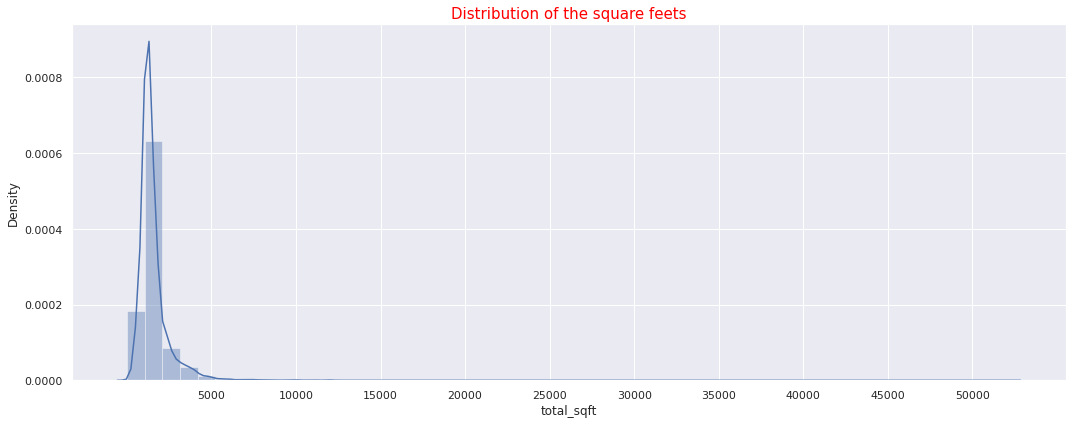

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(df['total_sqft'])
plt.title('Distribution of the square feets', fontsize=15, color='red')
plt.tight_layout()
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

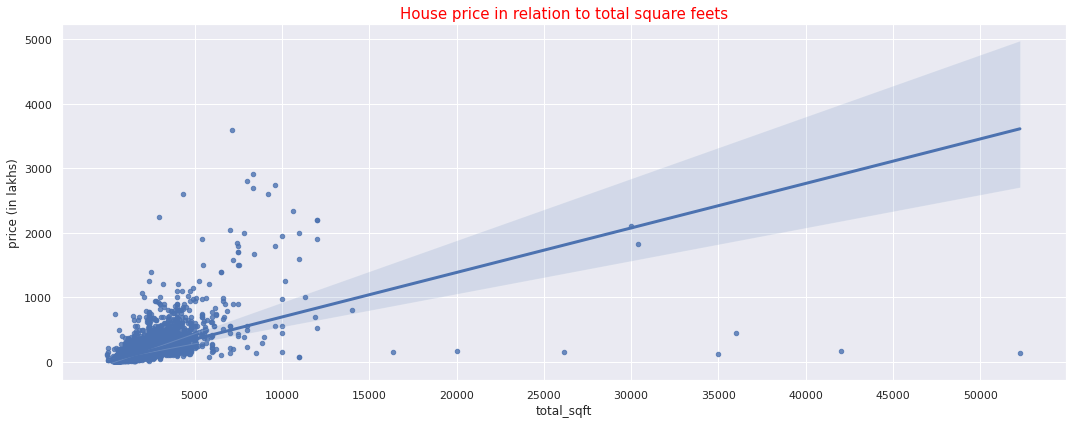

In [ ]:
plt.figure(figsize=(15, 6))
sns.regplot(x='total_sqft', y='price (in lakhs)', data=df, scatter_kws={"s": 20}, line_kws={"lw":3})
plt.title('House price in relation to total square feets', fontsize=15, color='red')
plt.tight_layout()
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

***Most of the house prices lies within 1 crore and 5 thousands square feets and seems there are some outliers in the total square feets.***

# Outlier Detection and Handling



***I have combined the two methods there. First, I made an effort to identify outliers in my own observations. Then, in order to identify outliers, I employed the standard deviation method.***

### **Detecting outliers by own observation**

In [ ]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price (in lakhs)
0,3,419,2.0,1056.0,2.0,1.0,39.07
1,2,317,4.0,2600.0,5.0,3.0,120.00
2,0,1179,3.0,1440.0,2.0,3.0,62.00
3,3,757,3.0,1521.0,3.0,1.0,95.00
4,3,716,2.0,1200.0,2.0,1.0,51.00


###### **area type column**

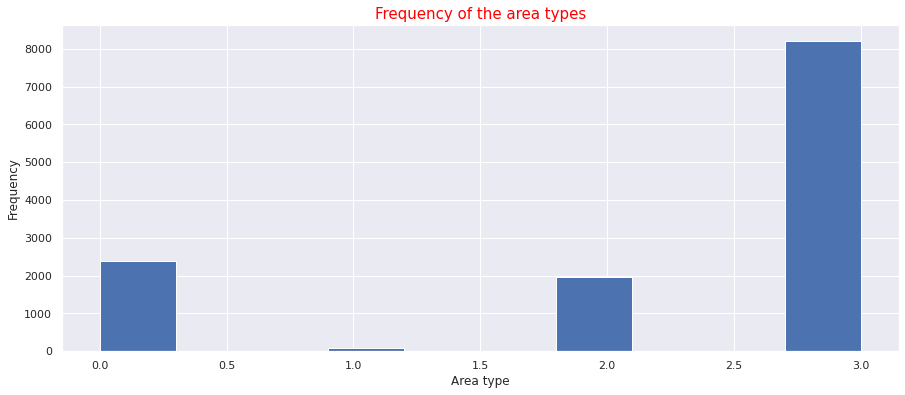

In [ ]:
df['area_type'].plot(kind='hist', figsize=(15, 6))
plt.xlabel('Area type')
plt.title('Frequency of the area types', fontsize=15, color='red')
plt.show()

**We know that-**

1.   0-Built up area
2.   1-carpet area
3.   2-plot area
4.   3-Super built up area

**We cannot say area type 1 is an outlier. For example, we take a sample of 10 people, 9 of them are men and 1 woman. What we're saying is that "1 female" is an anomaly. NO! Just the sample's makeup, which we have chosen, is the issue.**

###### **location column**

**For locations, we may consider any location that appears 5 or less than 5 times as an outlier. Because there are thousands of locations. We saw from the bivariate analysis that the top location appears 574 times which is more important than the less appeared location and we cannot approximate the model for these less number of the locations. So we consider the locations as outliers which appeared 5 or less than 5 times in the data. However, because they are in certain places, we don't completely eliminate them. We'll treat them as a new variable others which is encoded into 1306.**

In [ ]:
locs=df['location'].value_counts(ascending=False)
locs

1252    514
1039    368
417     282
664     236
1148    229
       ... 
32        1
171       1
1299      1
1180      1
87        1
Name: location, Length: 1306, dtype: int64

In [ ]:
len(locs[locs <= 5])

927

In [ ]:
df.location.max()

1305

In [ ]:
print(f"Unique locations before removing outliers from the location column:-> {len(df.location.unique())}\n")

outlier=locs[locs <= 5]
df.location= df.location.apply(lambda x: 1306 if x in outlier else x) # 1306 means 'others'

df.reset_index(drop=True, inplace=True)
print(f"Unique locations after removing outliers from the location column:-> {len(df.location.unique())}")

Unique locations before removing outliers from the location column:-> 1306

Unique locations after removing outliers from the location column:-> 380


In [ ]:
len(df[df['location']==1306])

1837

###### **size column**

**We will remove the data with 7 or more than 7 rooms**

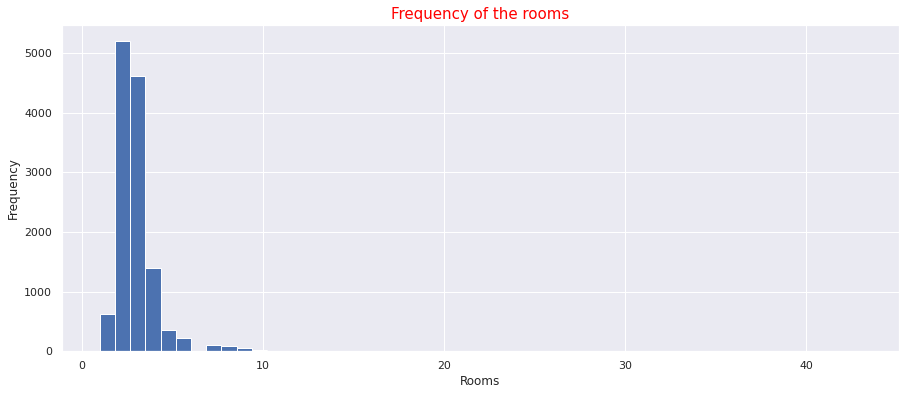

In [ ]:
df['size'].plot(kind='hist', figsize=(15, 6), bins=50)
plt.xlabel('Rooms')
plt.title('Frequency of the rooms', fontsize=15, color='red')
plt.show()

In [ ]:
print(f"Shape before removing outliers from the size column:-> {df.shape}\n")

df=df[df['size'] < 7]

print(f"Shape after removing outliers from the size column:-> {df.shape}\n")

Shape before removing outliers from the size column:-> (12668, 7)

Shape after removing outliers from the size column:-> (12400, 7)



In [ ]:
df.reset_index(drop=True, inplace=True)

###### **bath column**

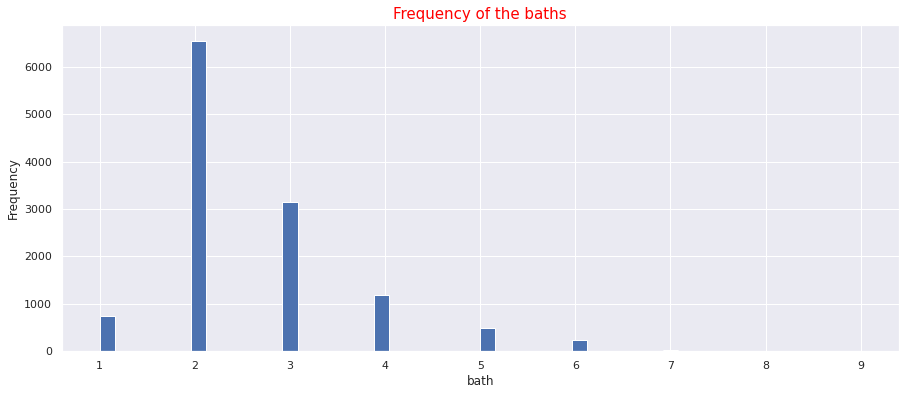

In [ ]:
df['bath'].plot(kind='hist', figsize=(15, 6), bins=50)
plt.xlabel('bath')
plt.title('Frequency of the baths', fontsize=15, color='red')
plt.show()

In [ ]:
df['bath'].min()

1.0

*****We will remove the data with more than 5 baths*****

In [ ]:
print(f"Shape before removing outliers from the baths column:-> {df.shape}\n")

df=df[df['bath'] < 6]
df.reset_index(drop=True, inplace=True)
print(f"Shape after removing outliers from the baths column:-> {df.shape}\n")

Shape before removing outliers from the baths column:-> (12400, 7)

Shape after removing outliers from the baths column:-> (12120, 7)



###### **balcony column**

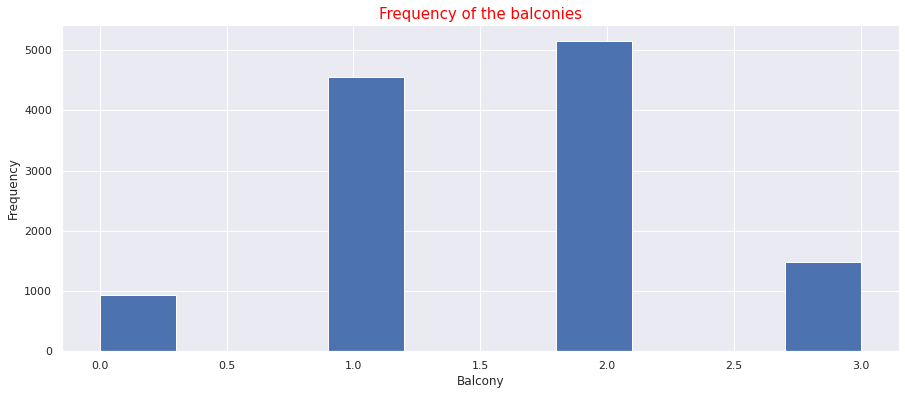

In [ ]:
df['balcony'].plot(kind='hist', figsize=(15, 6))
plt.xlabel('Balcony')
plt.title('Frequency of the balconies', fontsize=15, color='red')
plt.show()

***We will remove the houses with 0 balcony***

In [ ]:
print(f"Shape before removing outliers from the balcony column:-> {df.shape}\n")

df=df[df['balcony'] > 0.0]
df.reset_index(drop=True, inplace=True)
print(f"Shape after removing outliers from the balcony column:-> {df.shape}\n")

Shape before removing outliers from the balcony column:-> (12120, 7)

Shape after removing outliers from the balcony column:-> (11184, 7)



###### **total sqft column**

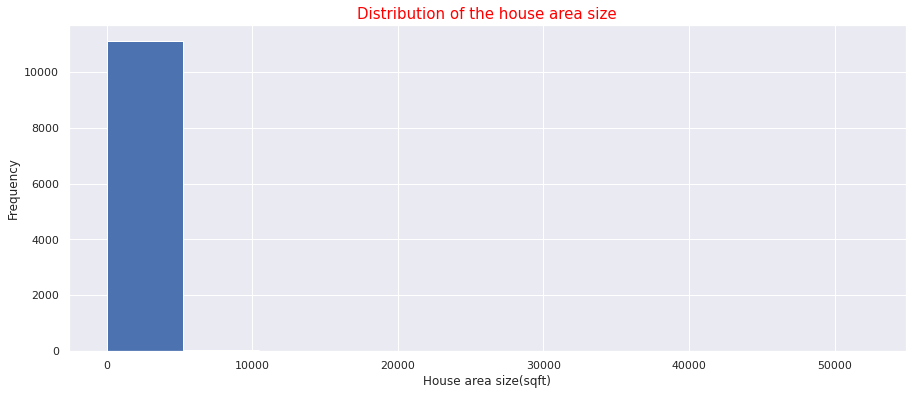

In [ ]:
df['total_sqft'].plot(kind='hist', figsize=(15, 6))
plt.xlabel('House area size(sqft)')
plt.title('Distribution of the house area size', fontsize=15, color='red')
plt.show()

***Removing the houses which are less than the 600 square feets***

In [ ]:
print(f"Shape before removing outliers from the total_sqft column:-> {df.shape}\n")

df=df[df['total_sqft'] > 600]
df.reset_index(drop=True, inplace=True)

print(f"Shape after removing outliers from the total_sqft column:-> {df.shape}\n")

Shape before removing outliers from the total_sqft column:-> (11184, 7)

Shape after removing outliers from the total_sqft column:-> (10857, 7)



### **Detecting outliers by Standard Deviation method**

In [ ]:
def outlier_handling(data, col):
  """This function is used to handle the outliers by using the Standard Deviation Method. It uses the cut-off for detecting outliers as greater than 3 
  standard deviations from the mean can be determined by first calculating the mean and standard deviation of a particular sample.

  Args:
      data: The dataset 
      col: The particular column

  Returns:
      It returns the dataset by removing the all outliers.
  """

  mean, std=data[col].mean(), data[col].std()
  print(f'Mean of {col}:-> {mean} and standard deviation of {col}:-> {std}\n')
  cut_off=std*3
  lower_cut_off, upper_cut_off=mean-cut_off, mean+cut_off
  lower_cut_off, upper_cut_off
  print(f"Lower bound and upper bound are:-> {lower_cut_off, upper_cut_off}\n")
  outliers=[x for x in data[col] if x<lower_cut_off or x>upper_cut_off]
  print(f"Number of outliers in the {col}: {len(outliers)}\n")
  print(f"Shape before removing outliers from the {col} column:-> {data.shape}\n")
  data=data.drop(data[(data[col] > upper_cut_off) | (data[col] < lower_cut_off)].index)
  data.reset_index(drop=True, inplace=True)
  print(f"Shape after removing outliers from the {col} column:-> {data.shape}")
  return data

###### **total sqft column**

In [ ]:
df=outlier_handling(df, 'total_sqft')

Mean of total_sqft:-> 1564.3170370099829 and standard deviation of total_sqft:-> 1151.7496964077143

Lower bound and upper bound are:-> (-1890.9320522131597, 5019.566126233125)

Number of outliers in the total_sqft: 78

Shape before removing outliers from the total_sqft column:-> (10857, 7)

Shape after removing outliers from the total_sqft column:-> (10779, 7)


###### **size column**

In [ ]:
df=outlier_handling(df, 'size')

Mean of size:-> 2.664440115038501 and standard deviation of size:-> 0.8193294748031174

Lower bound and upper bound are:-> (0.20645169062914892, 5.122428539447853)

Number of outliers in the size: 61

Shape before removing outliers from the size column:-> (10779, 7)

Shape after removing outliers from the size column:-> (10718, 7)


###### **bath column**

In [ ]:
df=outlier_handling(df, 'bath')

Mean of bath:-> 2.5267773838402685 and standard deviation of bath:-> 0.8430990351647987

Lower bound and upper bound are:-> (-0.0025197216541275047, 5.056074489334664)

Number of outliers in the bath: 0

Shape before removing outliers from the bath column:-> (10718, 7)

Shape after removing outliers from the bath column:-> (10718, 7)


###### **balcony column**

In [ ]:
df=outlier_handling(df, 'balcony')

Mean of balcony:-> 1.7348385892890466 and standard deviation of balcony:-> 0.6803340812721901

Lower bound and upper bound are:-> (-0.3061636545275237, 3.775840833105617)

Number of outliers in the balcony: 0

Shape before removing outliers from the balcony column:-> (10718, 7)

Shape after removing outliers from the balcony column:-> (10718, 7)


###### **price column**

In [ ]:
df=outlier_handling(df, 'price (in lakhs)')

Mean of price (in lakhs):-> 102.85258537040495 and standard deviation of price (in lakhs):-> 101.84553744675036

Lower bound and upper bound are:-> (-202.68402696984612, 408.389197710656)

Number of outliers in the price (in lakhs): 217

Shape before removing outliers from the price (in lakhs) column:-> (10718, 7)

Shape after removing outliers from the price (in lakhs) column:-> (10501, 7)


# Futher Checking after the Analysis and Cleaning Process

In [ ]:
df

,area_type,location,size,total_sqft,bath,balcony,price (in lakhs)
0,3,419,2.0,1056.0,2.0,1.0,39.07
1,2,317,4.0,2600.0,5.0,3.0,120.00
2,0,1179,3.0,1440.0,2.0,3.0,62.00
3,3,757,3.0,1521.0,3.0,1.0,95.00
4,3,716,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
10496,3,964,2.0,1050.0,2.0,2.0,52.71
10497,3,236,2.0,1262.0,2.0,2.0,47.00
10498,3,474,3.0,1715.0,3.0,3.0,112.00
10499,3,1004,4.0,3600.0,5.0,2.0,400.00


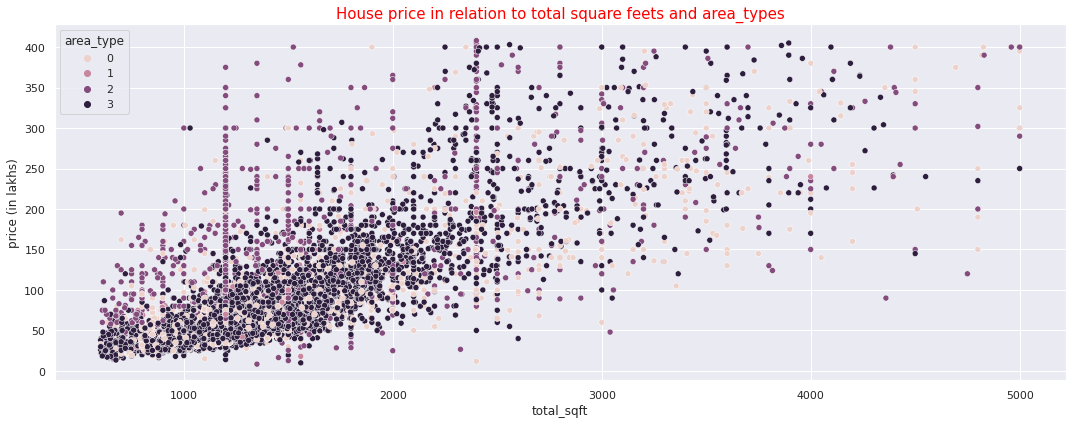

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='total_sqft', y='price (in lakhs)', hue='area_type', data=df)
plt.title(f"House price in relation to total square feets and area_types" , fontsize=15, color="red")
plt.tight_layout()
#plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

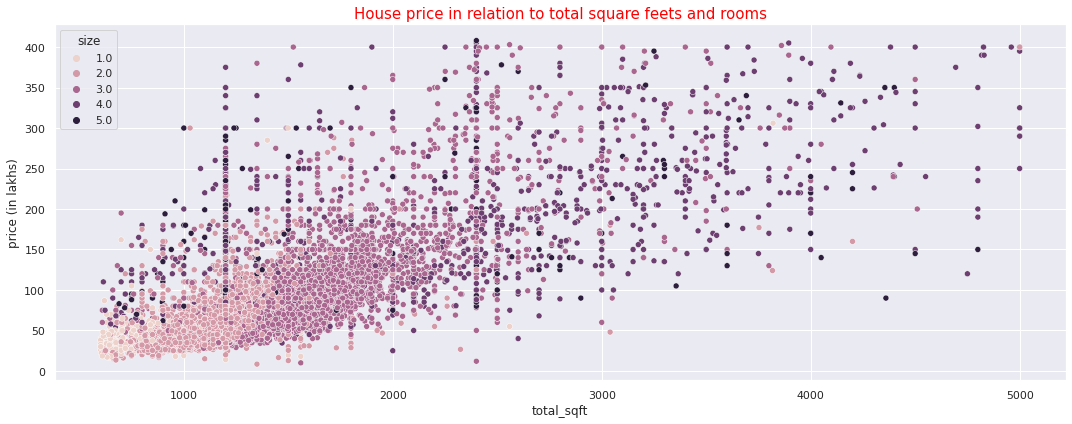

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='total_sqft', y='price (in lakhs)', hue='size', data=df)
plt.title(f"House price in relation to total square feets and rooms" , fontsize=15, color="red")
plt.tight_layout()
#plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

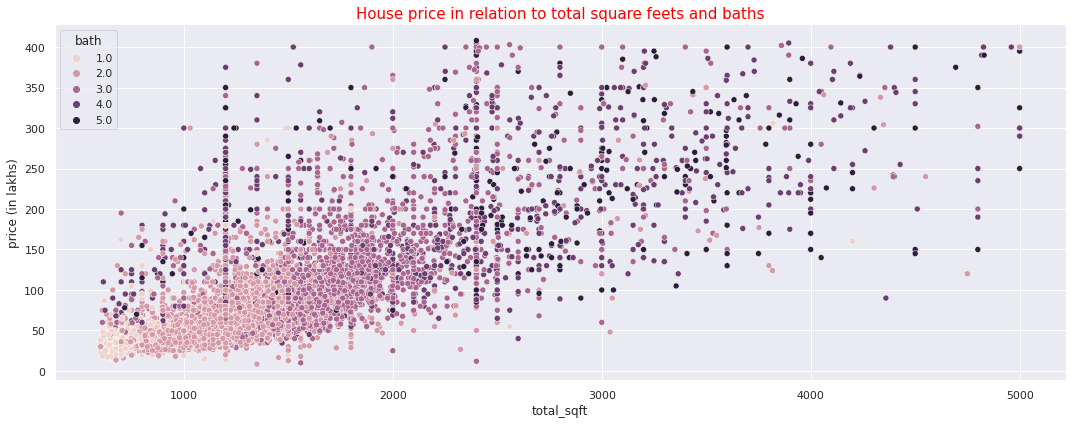

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='total_sqft', y='price (in lakhs)', hue='bath', data=df)
plt.title(f"House price in relation to total square feets and baths" , fontsize=15, color="red")
plt.tight_layout()
#plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

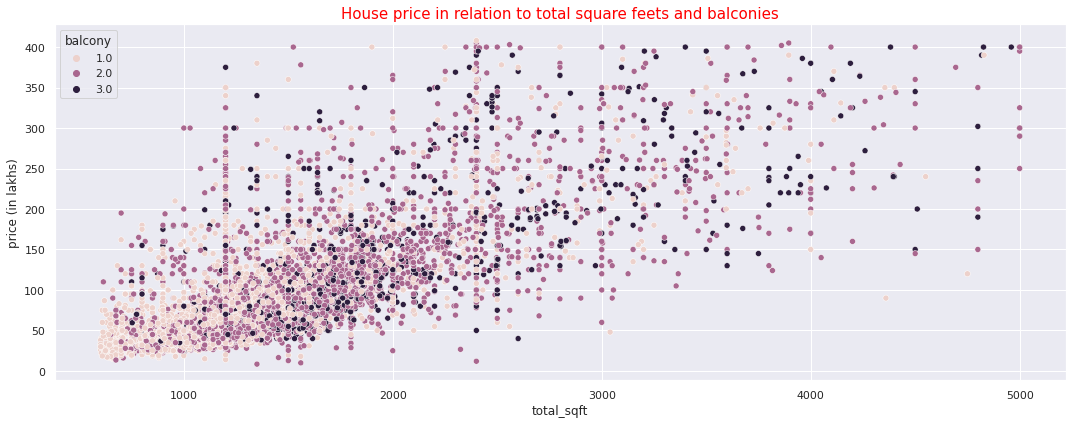

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='total_sqft', y='price (in lakhs)', hue='balcony', data=df)
plt.title(f"House price in relation to total square feets and balconies" , fontsize=15, color="red")
plt.tight_layout()
#plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])
plt.show()

***After the preceding processes, we can see that the data appears to be in reasonably decent shape.***

In [ ]:
print(f"Top five rows: \n\n{df.head()}\n\n\n")
print(f"Data shape: {df.shape}")

Top five rows: 

   area_type  location  size  total_sqft  bath  balcony  price (in lakhs)
0          3       419   2.0      1056.0   2.0      1.0             39.07
1          2       317   4.0      2600.0   5.0      3.0            120.00
2          0      1179   3.0      1440.0   2.0      3.0             62.00
3          3       757   3.0      1521.0   3.0      1.0             95.00
4          3       716   2.0      1200.0   2.0      1.0             51.00



Data shape: (10501, 7)


**The data are now prepared for modeling. The Clustering and Machine Leaning models are used to model the data in the modeling notebook.**

In [ ]:
df.to_csv('/content/drive/MyDrive/Zep Analytics/House_Data_Ready.csv', index=False)

### Findings and Conclusion



1.   Data transformation such as encoding, type conversion, missing value handling etc has been done properly.
2.   Exploratory data analysis (EDA) is done by the simple data analysis and the statistical analysis such as univariate analysis, bivrariate analysis.
3.   Outlier identification is performed during the statistical analysis and it is propoerly handled.
4.   Every feature is examined in separation and often, as in the case of a bivariate analysis, along with the house price values that make up the dataset's target variable.
5.   More advance analysis like hypothsis test can be done for improving the quality of the data



